# Imports

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
torch.set_grad_enabled(False)

In [2]:

from src.consts import FILTERATIONS
from src.datasets.download_dataset import load_splitted_counter_fact
from tqdm import tqdm
from src.types import MODEL_ARCH
from src.models.model_interface import get_model_interface


/home/yandex/DL20232024a/nirendy/repos/ADL_2/venv/lib/python3.12/site-packages/mamba_ssm/ops/selective_scan_interface.py:163: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/yandex/DL20232024a/nirendy/repos/ADL_2/venv/lib/python3.12/site-packages/mamba_ssm/ops/selective_scan_interface.py:239: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd
/home/yandex/DL20232024a/nirendy/repos/ADL_2/venv/lib/python3.12/site-packages/mamba_ssm/ops/triton/layer_norm.py:985: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/yandex/DL20232024a/nirendy/repos/ADL_2/venv/lib/python3.12/site-packages/mamba_ssm/ops/triton/layer_norm.py:1044: FutureWarning: `torch.cuda.amp.custom_bwd(args...)

In [3]:
n_layers = 48
window_sizes = [9, 15]

# Overall results

FileNotFoundError: [Errno 2] No such file or directory: 'block_last_acc_ws=9.parquet'

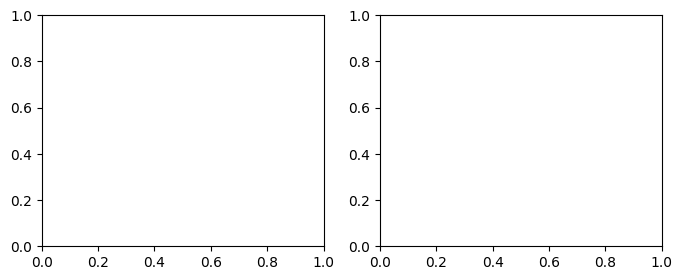

In [4]:
for window_size in window_sizes:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    df = pd.read_parquet(f'block_last_acc_ws={window_size}.parquet')
    block_last_acc = df.to_numpy()
    df = pd.read_parquet(f'block_subject_acc_ws={window_size}.parquet')
    block_subject_acc = df.to_numpy()
    df = pd.read_parquet(f'block_relation_acc_ws={window_size}.parquet')
    block_relation_acc = df.to_numpy()
    
    df = pd.read_parquet(f'block_last_diff_ws={window_size}.parquet')
    block_last_diff = df.to_numpy()
    df = pd.read_parquet(f'block_subject_diff_ws={window_size}.parquet')
    block_subject_diff = df.to_numpy()
    df = pd.read_parquet(f'block_relation_diff_ws={window_size}.parquet')
    block_relation_diff = df.to_numpy()
    layers = list(range(n_layers - window_size + 1))
    
    ax[0].plot(layers, block_last_acc * 100, label="last", color="orange", linestyle=":")
    ax[0].plot(layers, block_subject_acc * 100, label="subject", color="green")
    ax[0].plot(layers, block_relation_acc * 100, label="relation", color="purple", linestyle="--")
    ax[0].axhline(100, color="gray", linewidth=1)
    ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[0].set_xlabel('Layers')
    ax[0].set_ylabel('% accuracy')
    ax[0].set_title(f'Accuracy', fontsize=10)
    ax[0].legend(loc="lower left", fontsize=8)

    ax[1].plot(layers, block_last_diff, label="last", color="orange", linestyle=":")
    ax[1].plot(layers, block_subject_diff, label="subject", color="green")
    ax[1].plot(layers, block_relation_diff, label="relation", color="purple", linestyle="--")
    ax[1].axhline(0, color="gray", linewidth=1)
    ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[1].set_xlabel('Layers')
    ax[1].set_ylabel('% change in prediction probability')
    ax[1].set_title(f'Change in prediction probability', fontsize=10)
    ax[1].legend(loc="lower left", fontsize=8)
    
    plt.suptitle(f'Results with mamba2-1.3b and window size={window_size}')
    plt.tight_layout(pad=1, w_pad=3.0)
    plt.savefig(f'results_ws={window_size}.pdf', format="pdf")
    plt.show()

# Results when subject includes 1st token

In [ ]:
for window_size in window_sizes:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    df = pd.read_parquet(f'block_last_wf_acc_ws={window_size}.parquet')
    block_last_acc = df.to_numpy()
    df = pd.read_parquet(f'block_subject_wf_acc_ws={window_size}.parquet')
    block_subject_acc = df.to_numpy()
    df = pd.read_parquet(f'block_relation_wf_acc_ws={window_size}.parquet')
    block_relation_acc = df.to_numpy()
    
    df = pd.read_parquet(f'block_last_wf_diff_ws={window_size}.parquet')
    block_last_diff = df.to_numpy()
    df = pd.read_parquet(f'block_subject_wf_diff_ws={window_size}.parquet')
    block_subject_diff = df.to_numpy()
    df = pd.read_parquet(f'block_relation_wf_diff_ws={window_size}.parquet')
    block_relation_diff = df.to_numpy()
    layers = list(range(n_layers - window_size + 1))
    
    ax[0].plot(layers, block_last_acc * 100, label="last", color="orange", linestyle=":")
    ax[0].plot(layers, block_subject_acc * 100, label="subject", color="green")
    ax[0].plot(layers, block_relation_acc * 100, label="relation", color="purple", linestyle="--")
    ax[0].axhline(100, color="gray", linewidth=1)
    ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[0].set_xlabel('Layers')
    ax[0].set_ylabel('% accuracy')
    ax[0].set_title(f'Accuracy', fontsize=10)
    ax[0].legend(loc="lower left", fontsize=8)

    ax[1].plot(layers, block_last_diff, label="last", color="orange", linestyle=":")
    ax[1].plot(layers, block_subject_diff, label="subject", color="green")
    ax[1].plot(layers, block_relation_diff, label="relation", color="purple", linestyle="--")
    ax[1].axhline(0, color="gray", linewidth=1)
    ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[1].set_xlabel('Layers')
    ax[1].set_ylabel('% change in prediction probability')
    ax[1].set_title(f'Change in prediction probability', fontsize=10)
    ax[1].legend(loc="lower left", fontsize=8)
    
    plt.suptitle(f'Results with mamba2-1.3b and window size={window_size} when 1st is included in subject')
    plt.tight_layout(pad=1, w_pad=3.0)
    plt.savefig(f'results_wf_ws={window_size}.pdf', format="pdf")
    plt.show()

# Results when subject doesn't include 1st token

In [ ]:
for window_size in window_sizes:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    df = pd.read_parquet(f'block_last_wof_acc_ws={window_size}.parquet')
    block_last_acc = df.to_numpy()
    df = pd.read_parquet(f'block_subject_wof_acc_ws={window_size}.parquet')
    block_subject_acc = df.to_numpy()
    df = pd.read_parquet(f'block_relation_wof_acc_ws={window_size}.parquet')
    block_relation_acc = df.to_numpy()
    
    df = pd.read_parquet(f'block_last_wof_diff_ws={window_size}.parquet')
    block_last_diff = df.to_numpy()
    df = pd.read_parquet(f'block_subject_wof_diff_ws={window_size}.parquet')
    block_subject_diff = df.to_numpy()
    df = pd.read_parquet(f'block_relation_wof_diff_ws={window_size}.parquet')
    block_relation_diff = df.to_numpy()
    layers = list(range(n_layers - window_size + 1))
    
    ax[0].plot(layers, block_last_acc * 100, label="last", color="orange", linestyle=":")
    ax[0].plot(layers, block_subject_acc * 100, label="subject", color="green")
    ax[0].plot(layers, block_relation_acc * 100, label="relation", color="purple", linestyle="--")
    ax[0].axhline(100, color="gray", linewidth=1)
    ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[0].set_xlabel('Layers')
    ax[0].set_ylabel('% accuracy')
    ax[0].set_title(f'Accuracy', fontsize=10)
    ax[0].legend(loc="lower left", fontsize=8)

    ax[1].plot(layers, block_last_diff, label="last", color="orange", linestyle=":")
    ax[1].plot(layers, block_subject_diff, label="subject", color="green")
    ax[1].plot(layers, block_relation_diff, label="relation", color="purple", linestyle="--")
    ax[1].axhline(0, color="gray", linewidth=1)
    ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[1].set_xlabel('Layers')
    ax[1].set_ylabel('% change in prediction probability')
    ax[1].set_title(f'Change in prediction probability', fontsize=10)
    ax[1].legend(loc="lower left", fontsize=8)
    
    plt.suptitle(f'Results with mamba2-1.3b and window size={window_size} when 1st is not included in subject')
    plt.tight_layout(pad=1, w_pad=3.0)
    plt.savefig(f'results_wof_ws={window_size}.pdf', format="pdf")
    plt.show()